In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [91]:
# Loading the dataset
data=pd.read_csv("C:/Users/pc/Downloads/Titanic-Dataset.csv")

In [5]:
# loading the top five records
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# loading the bottom five records
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# displaying the size of dataset
data.size

10692

In [8]:
# checking whether dataset is having null values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.shape

(891, 12)

In [84]:
data.describe

<bound method NDFrame.describe of      Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0           0       3    0      1      0   7.2500       False        True
1           1       1    1      1      0  71.2833       False       False
2           1       3    1      0      0   7.9250       False        True
3           1       1    1      1      0  53.1000       False        True
4           0       3    0      0      0   8.0500       False        True
..        ...     ...  ...    ...    ...      ...         ...         ...
886         0       2    0      0      0  13.0000       False        True
887         1       1    1      0      0  30.0000       False        True
888         0       3    1      1      2  23.4500       False        True
889         1       1    0      0      0  30.0000       False       False
890         0       3    0      0      0   7.7500        True       False

[891 rows x 8 columns]>

In [88]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [42]:
data.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257307,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.549500,0.221009,0.081720
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182333,0.074115,-0.125722
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,0.257307,-0.549500,0.182333,0.159651,0.216225,1.000000,-0.117216,-0.166603
Embarked_Q,0.003650,0.221009,0.074115,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.125722,0.070941,0.063036,-0.166603,-0.496624,1.000000


In [10]:
X=data.iloc[6:,2:10]
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000
...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [11]:
Y=data.iloc[-5:,4]
Y

886      male
887    female
888    female
889      male
890      male
Name: Sex, dtype: object

In [12]:
# Data preprocessing for Titanic dataset
data = data.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1)

In [13]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [14]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [15]:
data=data.drop(['Age'], axis=1)

In [16]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,True
1,1,1,1,1,0,71.2833,False,False
2,1,3,1,0,0,7.9250,False,True
3,1,1,1,1,0,53.1000,False,True
4,0,3,0,0,0,8.0500,False,True


In [17]:
data.tail()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
886,0,2,0,0,0,13.00,False,True
887,1,1,1,0,0,30.00,False,True
888,0,3,1,1,2,23.45,False,True
889,1,1,0,0,0,30.00,False,False
890,0,3,0,0,0,7.75,True,False


In [18]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,1,0,7.2500,False,True
1,1,1,1,1,0,71.2833,False,False
2,1,3,1,0,0,7.9250,False,True
3,1,1,1,1,0,53.1000,False,True
4,0,3,0,0,0,8.0500,False,True


In [19]:
X=data.drop('Survived',axis=1)

In [20]:
Y=data['Survived']

In [ ]:
# spliting the data into training set and testing set..

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression(random_state=0)

In [24]:
model.fit(X_train,Y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [55]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(891, 7)
(712, 7)
(179, 7)


In [56]:
Y_pred_data=model.predict(X_train)

In [57]:
Y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [58]:
pred=print(model.predict(X_test))

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [63]:
# using random forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfm=RandomForestClassifier(n_estimators=150,random_state=52)

In [66]:
rfm.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=150, random_state=52)

In [72]:
y_pred_rf = rfm.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,classification_report

In [59]:
# Print results
print("LogisticRegression Model Results:")

LogisticRegression Model Results:


In [73]:
accuracy_rf=accuracy_score(Y_test,y_pred_rf)

In [82]:
f'Accuracy: {accuracy_rf:.2f}'

'Accuracy: 0.80'

In [83]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [60]:
# machice learing classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [67]:
Y_pred_data_rfm=model.predict(X_train)

In [61]:
l=knn_clf.predict(X_train[1:30])
print(l)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0]


In [62]:
l=knn_clf.score(X_test,Y_test)
print(l)

0.7932960893854749


In [38]:
# visualizing the dataset using differnet types of graph for better understanding

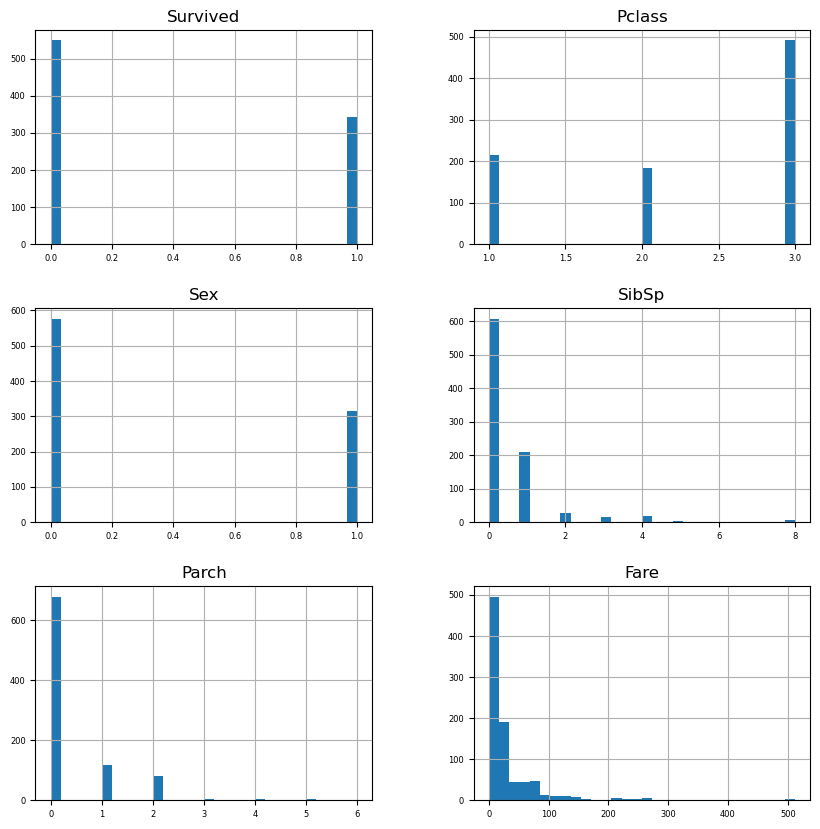

In [39]:
data.hist(figsize=(10, 10), bins=30, xlabelsize=6, ylabelsize=6);

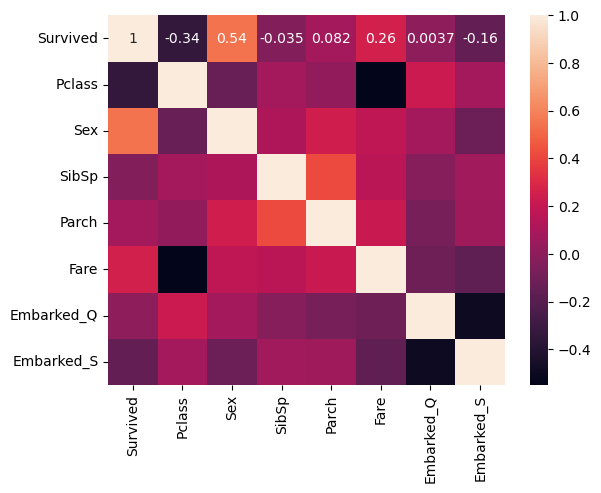

In [41]:
sns.heatmap(data.corr(),annot=True)
plt.show()

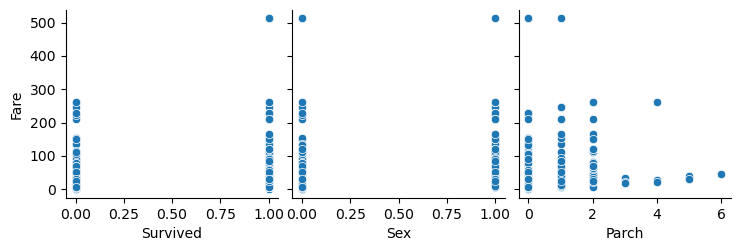

In [40]:
sns.pairplot(data, x_vars=['Survived','Sex', 'Parch'], y_vars='Fare', kind='scatter')
plt.show()

<Axes: ylabel='count'>

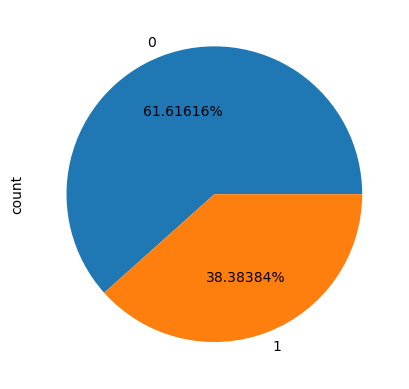

In [111]:
data['Survived'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

<Axes: ylabel='Frequency'>

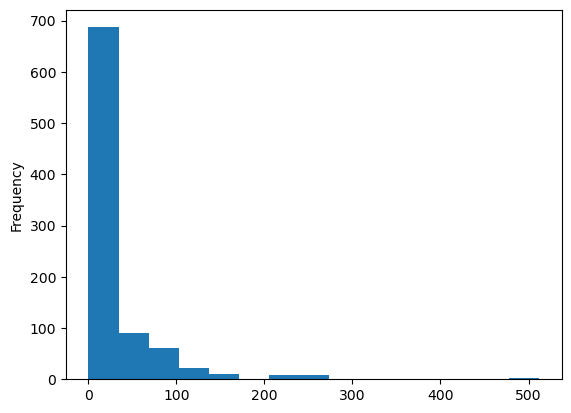

In [99]:
data['Fare'].plot.hist(bins=15)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

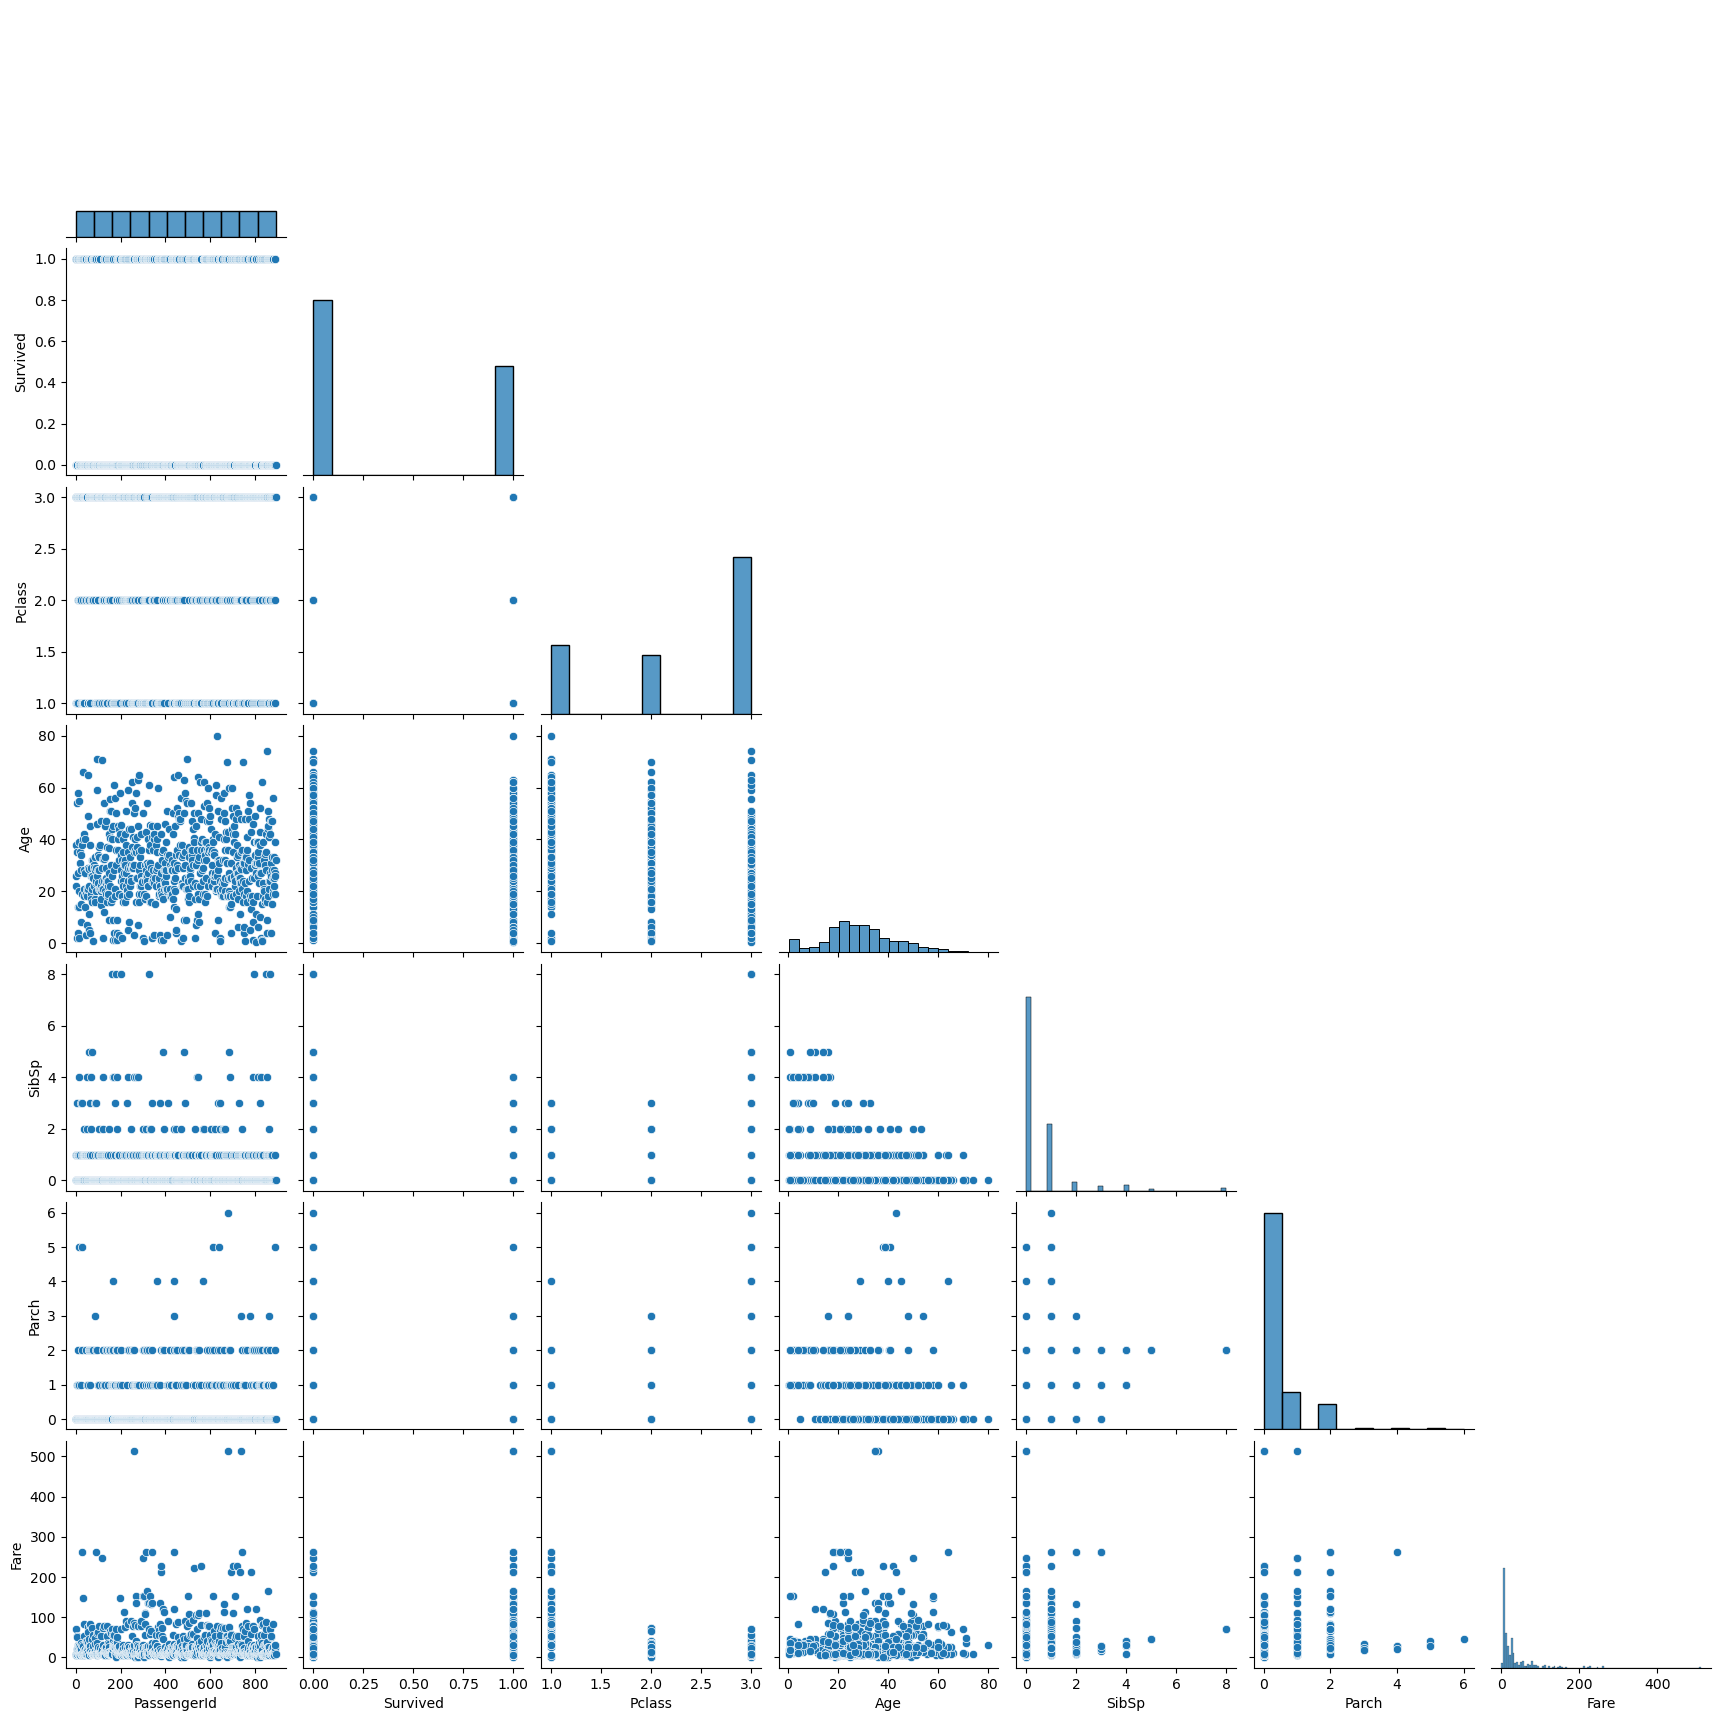

In [108]:
sns.pairplot(data, corner=True)